### Install a kernel in `IJulia / Jupyter Notebook`
Open Julia's REPL and do as follows.
```julia
julia> using IJulia
[ Info: Precompiling IJulia [7073ff75-c697-5162-941a-fcdaad2a7d2a]

julia> installkernel("Julia (2 threads)", env=Dict("JULIA_NUM_THREADS" => "2"))
[ Info: Installing Julia (2 threads) kernelspec in /home/phunc20/.local/share/jupyter/kernels/julia-(2-threads)-1.5
"/home/phunc20/.local/share/jupyter/kernels/julia-(2-threads)-1.5"

julia> notebook()
```
**Rmk.** One can indicate the root opened by `IJulia/Jupyter notebook` by specifying the arg `dir` as in `notebook(dir="~/home/downloads/")`

Once this is done, when Jupyter notebook is opened in the browser, one'd see sth similar to the following:

<img src="figs/kernel.png">

**Rmk.** Mr. Edelman chose to use `IJulia` for this lecture probably because he wanted to define the same function multiple times, each time modifying/improving it a little bit in order to better show the improvement each modification brings. In `Pluto` a function **can only** be defined exactly **one** cell, whereas in `IJulia/jupyter`, like with Python, functions can be defined and re-defined indefinitely.

In [1]:
function birthday_problem(n)
  success = 0
  for t = 1:n
    months = rand(1:12, 20)
    counts = [sum(months.==i) for i=1:12]
    # exactly 4 months having 2 people and 4 months having 3 peoples in counts
    success += sum(counts.==2) == 4 && sum(counts.==3) == 4
  end
  success / n
end

birthday_problem (generic function with 1 method)

## The correct proba = `0.0010604200990215478`

In [2]:
@time birthday_problem(10_000_000)

 26.681171 seconds (284.32 M allocations: 19.629 GiB, 13.39% gc time)


0.0010496

In [3]:
function birthday_distribution(t, n_times=50_000)
  v = zeros(t)
  for i = 1:t
    v[i] = birthday_problem(n_times)
  end
  h = fit(Histogram, v, .0005:.00001:.0015)
end

birthday_distribution (generic function with 2 methods)

In [4]:
using StatsBase

LoadError: [91mArgumentError: Package StatsBase not found in current path:[39m
[91m- Run `import Pkg; Pkg.add("StatsBase")` to install the StatsBase package.[39m


In [6]:
h = birthday_distribution(100)
h

Histogram{Int64,1,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  0.0005:1.0e-5:0.0015
weights: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  2, 0, 1, 0, 0, 0, 0, 0, 0, 0]
closed: left
isdensity: false

In [7]:
sum(h.weights)

99

In [8]:
sum(h.weights[50:end])

61

In [9]:
using Plots

In [10]:
?plot

search: plot plot! plotly plot3d Plots plot3d! plotlyjs plotattr plotarea



The main plot command. Use `plot` to create a new plot object, and `plot!` to add to an existing one:

```
    plot(args...; kw...)                  # creates a new plot window, and sets it to be the current
    plot!(args...; kw...)                 # adds to the `current`
    plot!(plotobj, args...; kw...)        # adds to the plot `plotobj`
```

There are lots of ways to pass in data, and lots of keyword arguments... just try it and it will likely work as expected. When you pass in matrices, it splits by columns. To see the list of available attributes, use the `plotattr([attr])` function, where `attr` is the symbol `:Series:`, `:Subplot:`, `:Plot` or `:Axis`. Pass any attribute to `plotattr` as a String to look up its docstring; e.g. `plotattr("seriestype")`.


In [11]:
#plotattr("seriestype")
plotattr(:Plot)

Defined Plot attributes are:
background_color, background_color_outside, display_type, dpi, extra_kwargs, extra_plot_kwargs, fontfamily, foreground_color, html_output_format, inset_subplots, layout, link, overwrite_figure, plot_title, plot_title_location, plot_titlefontcolor, plot_titlefontfamily, plot_titlefonthalign, plot_titlefontrotation, plot_titlefontsize, plot_titlefontvalign, pos, show, size, tex_output_standalone, thickness_scaling, warn_on_unsupported, window_title


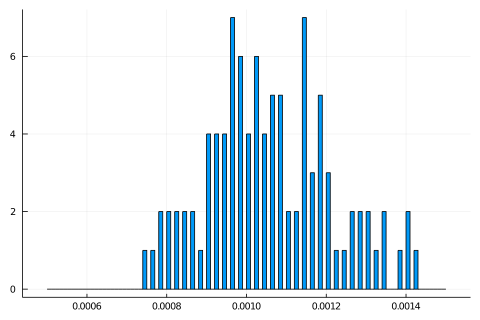

In [12]:
# if one doesn't specify size, the default is way too big.
#plot(h, legend=false, size=(200, 100))  # better but font still big
plot(h, legend=false, dpi=20)           # quite good

### `@SVector` stands for _Static Vector_
The only difference btw the following new definition and its predecessor is the addition of `@SVector`. However, this already gives a performance boost.

In [13]:
using StaticArrays  # For @SVector

In [14]:
# Wrong?
function birthday_problem(n)
  success = 0
  for t = 1:n
    months = @SVector rand(1:12, 20)
    counts = [sum(months.==i) for i=1:12]
    # exactly 4 months having 2 people and 4 months having 3 peoples in counts
    success += sum(counts.==2) == 4 && sum(counts.==3) == 4
  end
  success / n
end

birthday_problem (generic function with 1 method)

In [15]:
# Yes, it was wrong. But can you explain the reason?
function birthday_problem(n)
  success = 0
  for t = 1:n
    months = @SVector [rand(1:12) for _ in 1:20]
    counts = [sum(months.==i) for i=1:12]
    # exactly 4 months having 2 people and 4 months having 3 peoples in counts
    success += sum(counts.==2) == 4 && sum(counts.==3) == 4
  end
  success / n
end

birthday_problem (generic function with 1 method)

In [16]:
@time birthday_problem(10_000_000)

  6.485065 seconds (34.33 M allocations: 3.089 GiB, 10.31% gc time)


0.0010613

This `@SVector` thing is good for short vectors like those of size around `20-25`, but certainly not for vectors of size `100` or bigger.

Since it's good, let's apply it as many as possible.

In [17]:
# Yes, it was wrong. But can you explain the reason?
function birthday_problem(n)
  success = 0
  for t = 1:n
    months = @SVector [rand(1:12) for _ in 1:20]
    counts = @SVector [sum(months.==i) for i=1:12]
    # exactly 4 months having 2 people and 4 months having 3 peoples in counts
    success += sum(counts.==2) == 4 && sum(counts.==3) == 4
  end
  success / n
end

birthday_problem (generic function with 1 method)

In [18]:
@time birthday_problem(10_000_000)

  3.706288 seconds


0.0010677

## Parallel
Although there might be more games to be played in the **serial battlefield**, let's stop our optimization here and turn to **parallel** now.

In [19]:
using FLoops

In [20]:
function birthday_problem_floop(t, n_cores)
  v = 0
  @floop ThreadedEx(basesize=t÷n_cores) for _ in 1:t
    months = @SVector [rand(1:12) for _ in 1:20]
    counts = @SVector [sum(months.==i) for i in 1:12]
    success = sum(counts.==2) == 4 && sum(counts.==3) == 4
    @reduce(v += success)
  end
  v / t
end

birthday_problem_floop (generic function with 1 method)

Note that `÷` symbol is not a plus sign. Recall the diff btw `÷` and `/`.

In [21]:
7 ÷ 3

2

In [22]:
7 / 3

2.3333333333333335

In [23]:
7 // 3

7//3

In [24]:
@time birthday_problem_floop(10_000_000, 1)

  4.784896 seconds (149.25 k allocations: 6.185 MiB)


0.0010441

In [25]:
@time birthday_problem_floop(10_000_000, 2)

  2.673086 seconds (121.67 k allocations: 6.364 MiB)


0.0010591

In [26]:
@time birthday_problem_floop(10_000_000, 3)

  2.464800 seconds (155 allocations: 46.031 KiB)


0.0010623

In [27]:
@time birthday_problem_floop(10_000_000, 4)

  2.585304 seconds (144 allocations: 7.188 KiB)


0.0010601

In [28]:
@time birthday_problem_floop(10_000_000, 6)

  2.699714 seconds (312 allocations: 16.188 KiB)


0.0010488

In [29]:
@time birthday_problem_floop(10_000_000, 8)

  2.234993 seconds (311 allocations: 16.156 KiB)


0.0010846

In [30]:
@time birthday_problem_floop(1_000_000_000, 8)

227.624460 seconds (329 allocations: 16.859 KiB)


0.001060281

Note that this is not just to demonstrate the speed of parallel computing, it also allows the value being computed
- **more precise**
- and **faster**

### Histogram in parallel

In [31]:
function birthday_distribution_floop(t, n_cores)
  bins = .000005:.00001:.002
  empty_hist = birthday_distribution(0)
  @floop ThreadedEx(basesize=1) for _ in 1:n_cores
    @reduce(h = merge(empty_hist, birthday_distribution(t÷n_cores)))
  end
  h
end

birthday_distribution_floop (generic function with 1 method)

In [35]:
@time h = birthday_distribution_floop(10_000, 8)

138.856978 seconds (178 allocations: 110.219 KiB)


Histogram{Int64,1,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  0.0005:1.0e-5:0.0015
weights: [0, 0, 1, 0, 1, 0, 2, 0, 1, 0  …  49, 0, 39, 0, 19, 0, 16, 0, 17, 0]
closed: left
isdensity: false

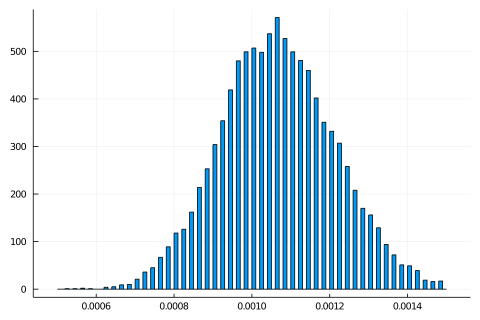

In [36]:
# if one doesn't specify size, the default is way too big.
#plot(h, legend=false, size=(200, 100))  # better but font still big
plot(h, legend=false, dpi=20)           # quite good

### Don't forget to watch the related video
[https://www.youtube.com/watch?v=nwdGsz4rc3Q](https://www.youtube.com/watch?v=nwdGsz4rc3Q)